In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("/kaggle/input/amazon-fine-food-reviews/Reviews.csv")
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [3]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


In [4]:
df.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [5]:
df.shape

(568454, 10)

In [6]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


True

In [7]:
df = df.sample(frac=0.2, random_state=42)
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
165256,165257,B000EVG8J2,A1L01D2BD3RKVO,"B. Miller ""pet person""",0,0,5,1268179200,Crunchy & Good Gluten-Free Sandwich Cookies!,Having tried a couple of other brands of glute...
231465,231466,B0000BXJIS,A3U62RE5XZDP0G,Marty,0,0,5,1298937600,great kitty treats,My cat loves these treats. If ever I can't fin...
427827,427828,B008FHUFAU,AOXC0JQQZGGB6,Kenneth Shevlin,0,2,3,1224028800,COFFEE TASTE,A little less than I expected. It tends to ha...
433954,433955,B006BXV14E,A3PWPNZVMNX3PA,rareoopdvds,0,1,2,1335312000,So the Mini-Wheats were too big?,"First there was Frosted Mini-Wheats, in origin..."
70260,70261,B007I7Z3Z0,A1XNZ7PCE45KK7,Og8ys1,0,2,5,1334707200,Great Taste . . .,and I want to congratulate the graphic artist ...
...,...,...,...,...,...,...,...,...,...,...
205323,205324,B001BORBHO,A32W59WJVK4QEV,Miss T.,0,0,5,1337472000,Picky dog gobbles it up!,I have two rescue chihuahua mix dogs (2yr old ...
95366,95367,B0019GVYKO,A2RGNM8EXDXKNU,CL in Phoenix,5,5,5,1303171200,"Warm, Rich & Delicious",Had this cereal while visiting family at Chris...
75510,75511,B0014ET2XM,A1FGPLKPZ0ZDHA,Some Mom,1,1,4,1292544000,campbells cheese soup,Was getting this every 60 days. Cancelled beca...
381923,381924,B001LNHQ34,A16P1QOC8HZ55Z,K. M.,3,3,5,1342137600,"So far, it's the best salt I have found",I felt that I had to give an update reassuring...


In [8]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [9]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    words = text.split()  # Tokenize the text
    words = [stemmer.stem(word) for word in words if word not in stop_words]  # Remove stop words and stem
    return ' '.join(words)

In [11]:
df['Text'] = df['Text'].apply(preprocess_text)

In [12]:
df['Score'].value_counts()

Score
5    72902
4    16123
1    10326
3     8485
2     5855
Name: count, dtype: int64

**Word Cloud**

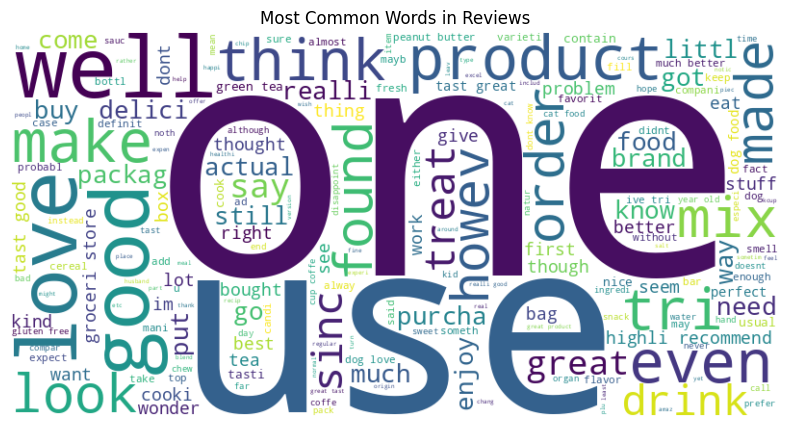

In [13]:
all_words = ' '.join([text for text in df['Text']])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Reviews')
plt.show()

**Most Common Words in Reviews**

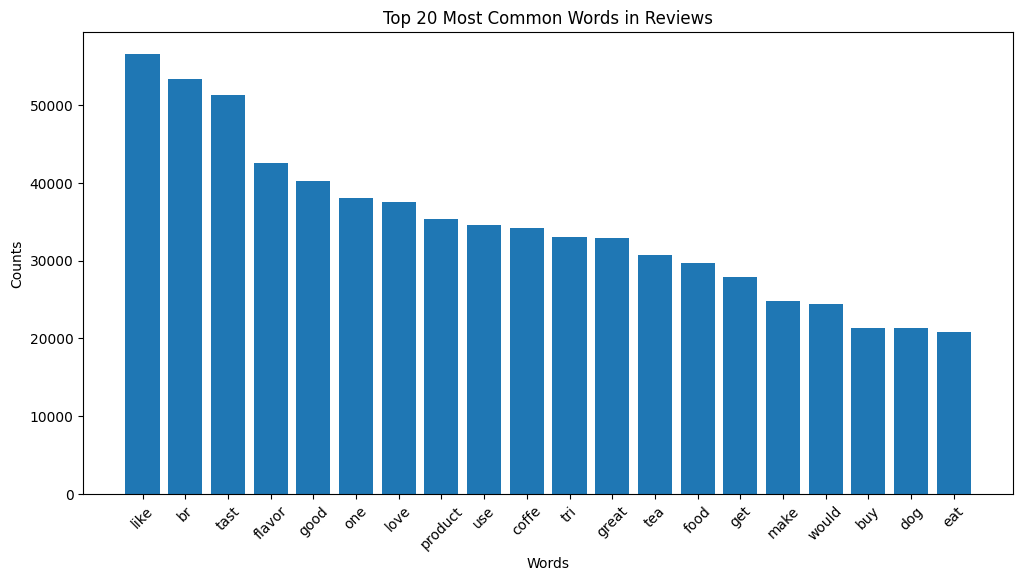

In [14]:
word_counts = Counter(all_words.split())
common_words = word_counts.most_common(20)
words, counts = zip(*common_words)
plt.figure(figsize=(12, 6))
plt.bar(words, counts)
plt.title('Top 20 Most Common Words in Reviews')
plt.xlabel('Words')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.show()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Score'], test_size=0.2, random_state=42)

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

**Logistic Regression**

In [17]:
logreg = LogisticRegression()
logreg.fit(X_train_vec, y_train)
y_pred_logreg = logreg.predict(X_test_vec)
print("Logistic Regression Model Evaluation")
print(classification_report(y_test, y_pred_logreg))

Logistic Regression Model Evaluation
              precision    recall  f1-score   support

           1       0.65      0.60      0.63      2121
           2       0.40      0.15      0.22      1166
           3       0.42      0.23      0.29      1722
           4       0.44      0.22      0.29      3233
           5       0.77      0.95      0.85     14497

    accuracy                           0.72     22739
   macro avg       0.54      0.43      0.46     22739
weighted avg       0.67      0.72      0.68     22739



/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**naive bayes**

In [18]:
rf = RandomForestClassifier()
rf.fit(X_train_vec, y_train)
y_pred_rf = rf.predict(X_test_vec)
print("Random Forest Model Evaluation")
print(classification_report(y_test, y_pred_rf))

Random Forest Model Evaluation
              precision    recall  f1-score   support

           1       0.85      0.40      0.55      2121
           2       1.00      0.19      0.32      1166
           3       0.90      0.23      0.36      1722
           4       0.89      0.22      0.35      3233
           5       0.71      1.00      0.83     14497

    accuracy                           0.73     22739
   macro avg       0.87      0.41      0.48     22739
weighted avg       0.78      0.73      0.67     22739



In [19]:
sample_reviews = [
    "This product is fantastic! I love it.",
    "Terrible product. Would not recommend.",
    "It's okay, not the best but not the worst.",
    "Absolutely wonderful! Exceeded my expectations.",
    "I hated this item. Complete waste of money."
]


In [43]:
sample_reviews_cleaned = [preprocess_text(review) for review in sample_reviews]
sample_reviews_vec = vectorizer.transform(sample_reviews_cleaned)

sample_preds_logreg = logreg.predict(sample_reviews_vec)
sample_preds_rf = rf.predict(sample_reviews_vec)

print("Sample Predictions (Logistic Regression):")
for review, sentiment in zip(sample_reviews, sample_preds_logreg):
    print(f"Review: {review}\nPredicted Class: {sentiment}\n")

print("Sample Predictions (Naive Bayes):")
for review, sentiment in zip(sample_reviews, sample_preds_rf):
    print(f"Review: {review}\nPredicted Class: {sentiment}\n")


Sample Predictions (Logistic Regression):
Review: This product is fantastic! I love it.
Predicted Class: 5

Review: Terrible product. Would not recommend.
Predicted Class: 1

Review: It's okay, not the best but not the worst.
Predicted Class: 3

Review: Absolutely wonderful! Exceeded my expectations.
Predicted Class: 5

Review: I hated this item. Complete waste of money.
Predicted Class: 1

Sample Predictions (Naive Bayes):
Review: This product is fantastic! I love it.
Predicted Class: 5

Review: Terrible product. Would not recommend.
Predicted Class: 1

Review: It's okay, not the best but not the worst.
Predicted Class: 3

Review: Absolutely wonderful! Exceeded my expectations.
Predicted Class: 5

Review: I hated this item. Complete waste of money.
Predicted Class: 1

